<a href="https://colab.research.google.com/github/Rishik-J/QuantFinance/blob/main/QDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
data = pd.read_csv("spydec6.csv", on_bad_lines='skip', parse_dates=True, index_col=0)
data.rename(columns = {'Bid.1':'Bid1', 'Ask.1':'Ask1'}, inplace = True)
len(data.index)

1756

In [4]:
columns = ['Bid', 'Ask', 'Strike', 'Bid1', 'Ask1']
data = data[columns]
data = data.loc['2022-12-7']
data = data[data.Bid1 > 0]
data = data[data.Bid > 0]
data = data[data.Ask > 0]
data = data[data.Ask1 > 0]
data.head()

,Bid,Ask,Strike,Bid1,Ask1
Expiration Date,,,,,
2022-12-07,40.37,40.58,358.0,0.01,0.02
2022-12-07,39.37,39.58,359.0,0.01,0.02
2022-12-07,38.37,38.58,360.0,0.01,0.02
2022-12-07,37.37,37.58,361.0,0.01,0.02
2022-12-07,36.37,36.58,362.0,0.01,0.02


In [5]:
def mid(bid, ask):
  return (bid+ask)/2

callmid = []
putmid = []
for index, row in data.iterrows():
  callmid.append(mid(row['Bid'], row['Ask']))
  putmid.append(mid(row['Bid1'], row['Ask1']))

data['callmid'] = callmid
data['Putmid'] = putmid

data.head()

,Bid,Ask,Strike,Bid1,Ask1,callmid,Putmid
Expiration Date,,,,,,,
2022-12-07,40.37,40.58,358.0,0.01,0.02,40.475,0.015
2022-12-07,39.37,39.58,359.0,0.01,0.02,39.475,0.015
2022-12-07,38.37,38.58,360.0,0.01,0.02,38.475,0.015
2022-12-07,37.37,37.58,361.0,0.01,0.02,37.475,0.015
2022-12-07,36.37,36.58,362.0,0.01,0.02,36.475,0.015


In [6]:
difference = data['Strike'].diff()
data['delta'] = difference
data.head()

,Bid,Ask,Strike,Bid1,Ask1,callmid,Putmid,delta
Expiration Date,,,,,,,,
2022-12-07,40.37,40.58,358.0,0.01,0.02,40.475,0.015,NaN
2022-12-07,39.37,39.58,359.0,0.01,0.02,39.475,0.015,1.0
2022-12-07,38.37,38.58,360.0,0.01,0.02,38.475,0.015,1.0
2022-12-07,37.37,37.58,361.0,0.01,0.02,37.475,0.015,1.0
2022-12-07,36.37,36.58,362.0,0.01,0.02,36.475,0.015,1.0


In [7]:
calls = []
puts = []
for i in range (len(data.index)-2):
  calls.append(data.iloc[i, 5]-2*data.iloc[i+1, 5]+data.iloc[i+2, 5])
  puts.append(data.iloc[i, 6]-2*data.iloc[i+1, 6]+data.iloc[i+2, 6])

calls.append(data.iloc[len(data.index)-2, 5]-2*data.iloc[len(data.index)-1, 5])
calls.append(0)
puts.append(data.iloc[len(data.index)-2, 6]-2*data.iloc[len(data.index)-1, 6])
puts.append(0)
data['ButterflyCalls'] = calls
data['ButterflyPuts'] = puts

In [8]:
data.tail()

,Bid,Ask,Strike,Bid1,Ask1,callmid,Putmid,delta,ButterflyCalls,ButterflyPuts
Expiration Date,,,,,,,,,,
2022-12-07,0.03,0.04,410.0,11.50,11.67,0.035,11.585,1.0,0.000,-0.010
2022-12-07,0.02,0.03,411.0,12.51,12.68,0.025,12.595,1.0,0.010,-0.025
2022-12-07,0.01,0.02,412.0,13.51,13.68,0.015,13.595,1.0,0.000,0.045
2022-12-07,0.01,0.02,413.0,14.48,14.66,0.015,14.570,1.0,-0.015,-16.610
2022-12-07,0.01,0.02,414.0,15.50,15.68,0.015,15.590,1.0,0.000,0.000


In [9]:
def addQToDataframe(data, strike):
  q = []
  for index, row in data.iterrows():
    if(row['Strike'] < strike):
      q.append((row['ButterflyPuts']/math.pow(row['delta'], 2)) * row['delta'])
    else:
      q.append((row['ButterflyCalls']/math.pow(row['delta'], 2)) * row['delta'])
  data['Q'] = q
  return data

In [10]:
data = addQToDataframe(data, 396)

In [11]:
data['Q'].sum()

0.9699999999999998

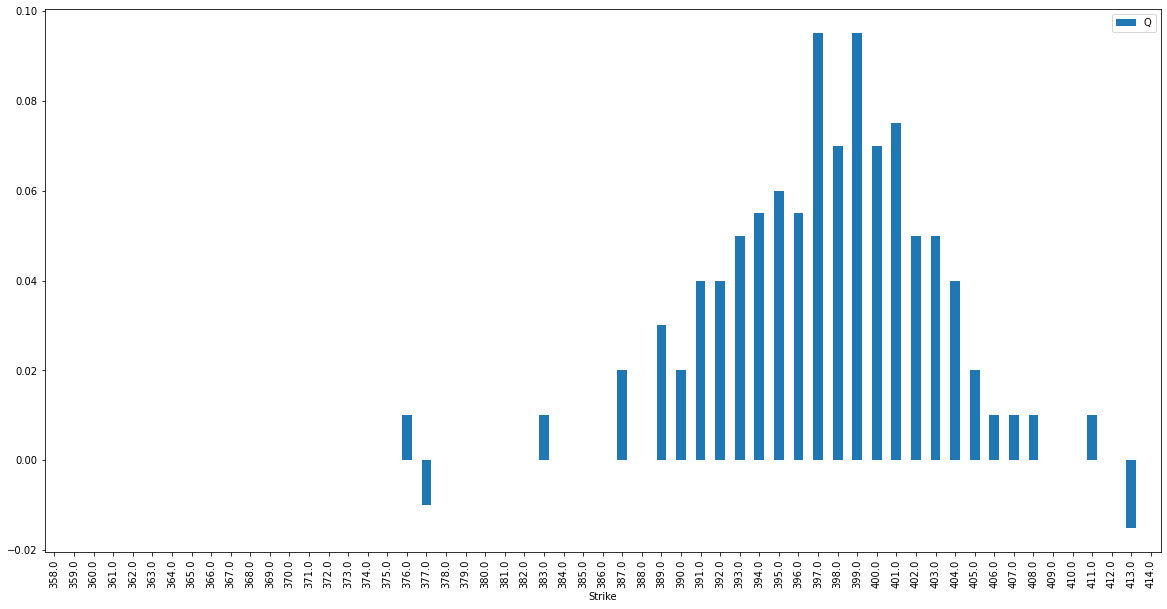

In [12]:
data.plot(x='Strike', y='Q', style='o', kind='bar', figsize=(20, 10))

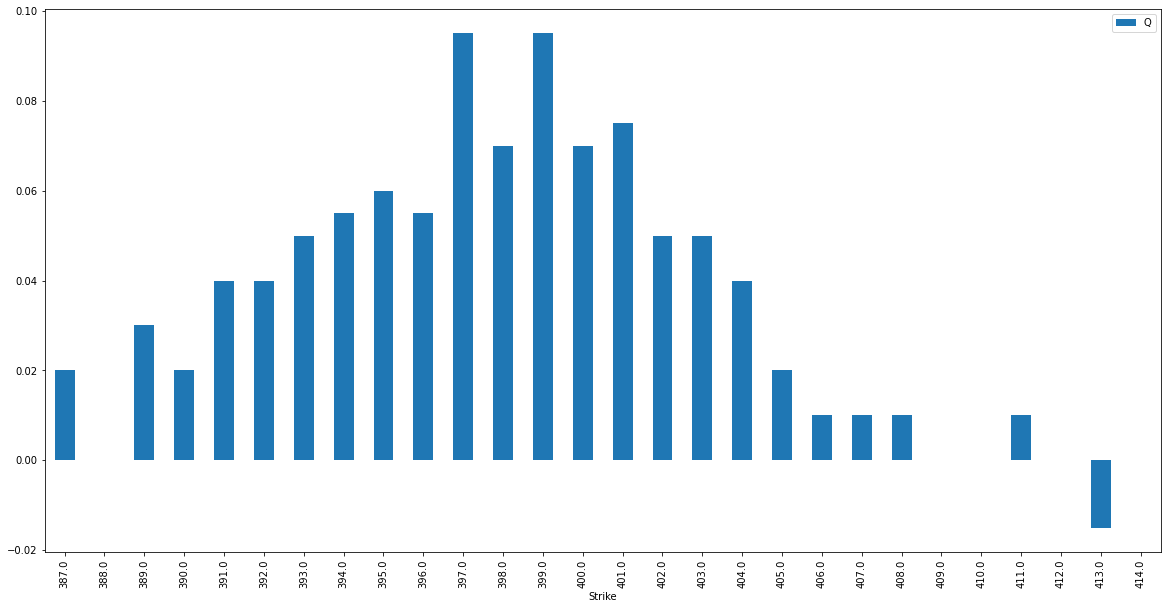

In [13]:
data.loc[data['Strike'] >= 387].plot(x='Strike', y='Q', style='o', kind='bar', figsize=(20, 10))